<a href="https://colab.research.google.com/github/vinayshanbhag/filters/blob/main/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

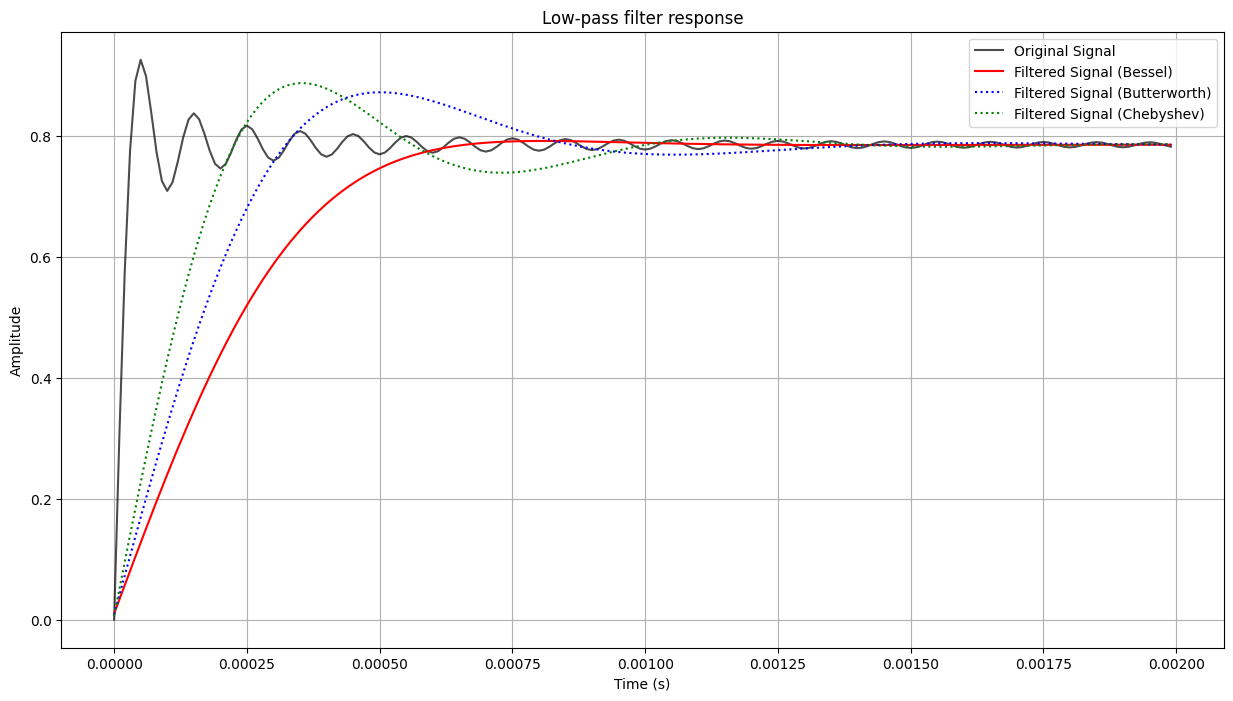

In [83]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Signal parameters
fs = 100000  # Sampling frequency (Hz)
T = 2      # Signal duration (seconds)
t = np.linspace(0, T, int(fs * T), endpoint=False)
f1 = 1    # Frequency of first sine wave (Hz)
f_noise = 0 # Frequency of noise (Hz)
signal_data = np.sin(2 * np.pi * f1 * t) + 0.01*np.sin(2 * np.pi * f_noise * t)
for i in range(3,10000,2):
  signal_data += 1/i * np.sin(2 * np.pi * f1*i * t)

#filter parameters
order = 3       # Filter order
cutoff_freq = 1000 # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff = cutoff_freq / nyquist_freq

# Design the Bessel filter (second-order sections representation for stability)
sos = signal.bessel(order, normalized_cutoff, btype='low', output='sos')
# Apply the filter using sosfiltfilt for zero-phase filtering
filtered_signal = signal.sosfiltfilt(sos, signal_data)

bw = signal.butter(order,normalized_cutoff,btype='low',analog=False, output='sos')
filtered_bw_signal = signal.sosfiltfilt(bw, signal_data)

cheby1 = signal.cheby1(order,rp=0.1,Wn=normalized_cutoff,btype='low',analog=False, output='sos')
filtered_cheby1_signal = signal.sosfiltfilt(cheby1, signal_data)

# Plotting the results
seg=200 #plot segment
plt.figure(figsize=(15, 8))
plt.plot(t[:seg], signal_data[:seg], label='Original Signal', alpha=0.7, color='black', linestyle='solid')
plt.plot(t[:seg], filtered_signal[:seg], label='Filtered Signal (Bessel)', color='red', linestyle='solid')
plt.plot(t[:seg], filtered_bw_signal[:seg], label='Filtered Signal (Butterworth)', color='blue', linestyle=':')
plt.plot(t[:seg], filtered_cheby1_signal[:seg], label='Filtered Signal (Chebyshev)', color='green', linestyle=':')
plt.title('Low-pass filter response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()